In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Question 1

(a)

In [2]:
df = pd.read_csv('data/strongdrink.txt')

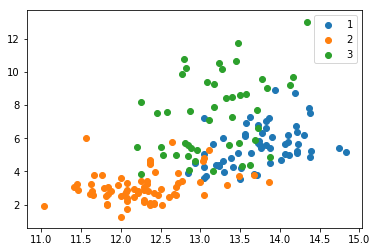

In [5]:
fig, ax = plt.subplots()

for t in np.unique(df['cultivar']):
    w = df[df['cultivar'] == t]
    x = w['alco']
    y = w['color_int']
    ax.scatter(x, y, label = t)

ax.legend()
plt.show()

(b)

In [6]:
X = df[['alco', 'malic', 'tot_phen', 'color_int']]
y = df['cultivar']
logit = LogisticRegression()

In [8]:
param_dist1 = {'penalty': ['l1', 'l2'], 'C': sp_uniform(0.1, 10.0)}

random_search1 = RandomizedSearchCV(logit, param_distributions = param_dist1,
                                    n_iter = 200, n_jobs = -1, cv = 5, random_state = 25,
                                    scoring = 'neg_mean_squared_error')

random_search1.fit(X, y)
print('Best Estimator1 =', random_search1.best_estimator_)
print('Best Tuning Params1 =', random_search1.best_params_)
print('Best Score1 =', -random_search1.best_score_)

Best Estimator1 = LogisticRegression(C=2.665871587495725, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
Best Tuning Params1 = {'C': 2.665871587495725, 'penalty': 'l1'}
Best Score1 = 0.11931818181818182


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(c)

In [9]:
param_dist2 = {'n_estimators': sp_randint(10, 200),
               'max_depth': sp_randint(2, 4),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}

tree = RandomForestClassifier(bootstrap = True, oob_score = True, random_state = 25)

random_search2 = RandomizedSearchCV(tree, param_distributions = param_dist2,
                                    n_iter = 200, n_jobs = -1, cv = 5, random_state = 25,
                                    scoring = 'neg_mean_squared_error')

random_search2.fit(X, y)
print('Best Estimator2 =', random_search2.best_estimator_)
print('Best Tuning Params2 =', random_search2.best_params_)
print('Best Score2 =', -random_search2.best_score_)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Estimator2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=18,
            min_weight_fraction_leaf=0.0, n_estimators=176, n_jobs=None,
            oob_score=True, random_state=25, verbose=0, warm_start=False)
Best Tuning Params2 = {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 13, 'min_samples_split': 18, 'n_estimators': 176}
Best Score2 = 0.13068181818181818


(d)

In [10]:
param_dist3 = {'C': sp_uniform(loc = 0.1, scale = 10.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}

svc = SVC(kernel = 'rbf')

random_search3 = RandomizedSearchCV(svc, param_distributions = param_dist3,
                                    n_iter = 200, n_jobs = -1, cv = 5, random_state = 25,
                                    scoring = 'neg_mean_squared_error')

random_search3.fit(X, y)
print('Best Estimator3 =', random_search3.best_estimator_)
print('Best Tuning Params3 =', random_search3.best_params_)
print('Best Score3 =', -random_search3.best_score_)

Best Estimator3 = SVC(C=3.3605112613782553, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best Tuning Params3 = {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
Best Score3 = 0.14772727272727273


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(e)

In [11]:
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}

clf_mlp = MLPClassifier(activation = 'tanh', solver = 'lbfgs', alpha = 0.1)

random_search4 = RandomizedSearchCV(clf_mlp, param_distributions = param_dist4,
                                    n_iter = 200, n_jobs = -1, cv = 5, random_state = 25,
                                    scoring = 'neg_mean_squared_error')

random_search4.fit(X, y)
print('Best Estimator4 =', random_search4.best_estimator_)
print('Best Tuning Params4 =', random_search4.best_params_)
print('Best Score4 =', -random_search4.best_score_)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Estimator4 = MLPClassifier(activation='relu', alpha=0.47362547312722036, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=57, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Best Tuning Params4 = {'activation': 'relu', 'alpha': 0.47362547312722036, 'hidden_layer_sizes': 57}
Best Score4 = 0.06818181818181818


(f)

The multiple layer perceptron model (MLPClassifier) is the best predictor of cultivar because it has the lowest MSE among all the models.